In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras

In [ ]:
from keras import Sequential
from keras.layers import Conv2D,Activation,Dropout,Flatten,Dense,MaxPooling2D,BatchNormalization
from tensorflow.keras.utils import img_to_array,load_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np
import os 
import cv2

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bootcamp/data.csv")

In [ ]:
data.drop("Unnamed: 0",axis=1,inplace=True)
print(data.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '16375', '16376', '16377', '16378', '16379', '16380', '16381', '16382',
       '16383', 'Label'],
      dtype='object', length=16385)


In [ ]:
x =data.drop("Label",axis=1).values
x= x.reshape(-1,128,128,1)
y =data["Label"]
NumberOfClass =len(set(y))
y= to_categorical(y,num_classes= len(set(y)))

In [ ]:
print("X shape: ",x.shape)
print("Y shape: ",y.shape)

X shape:  (8732, 128, 128, 1)
Y shape:  (8732, 10)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
print("number_of_train",number_of_train)
print("number_of_test",number_of_test)

number_of_train 7422
number_of_test 1310


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape = (128,128,1),filters=64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())


model.add(Conv2D(filters=64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Conv2D(filters=64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Conv2D(filters=64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation("relu"))
model.add(Dropout(0.3))

model.add(Dense(units=NumberOfClass))   # çıkış sayısı layer kadar olması lazım
model.add(Activation("softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
            
              metrics=["accuracy"])

In [ ]:
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
232/232 [==============================] - 23s 38ms/step - loss: 1.7711 - accuracy: 0.3684 - val_loss: 2.9559 - val_accuracy: 0.0443
Epoch 2/100
232/232 [==============================] - 8s 34ms/step - loss: 1.2231 - accuracy: 0.5663 - val_loss: 2.8854 - val_accuracy: 0.1710
Epoch 3/100
232/232 [==============================] - 8s 34ms/step - loss: 1.0454 - accuracy: 0.6366 - val_loss: 1.1604 - val_accuracy: 0.6130
Epoch 4/100
232/232 [==============================] - 8s 34ms/step - loss: 0.8872 - accuracy: 0.6947 - val_loss: 0.8638 - val_accuracy: 0.6740
Epoch 5/100
232/232 [==============================] - 8s 34ms/step - loss: 0.8111 - accuracy: 0.7193 - val_loss: 0.7458 - val_accuracy: 0.7473
Epoch 6/100
232/232 [==============================] - 8s 34ms/step - loss: 0.7510 - accuracy: 0.7451 - val_loss: 0.6891 - val_accuracy: 0.7649
Epoch 7/100
232/232 [==============================] - 8s 35ms/step - loss: 0.6854 - accuracy: 0.7619 - val_loss: 0.6260 - val_accuracy

In [ ]:
model.save_weights("weight.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


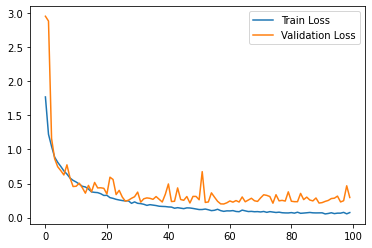

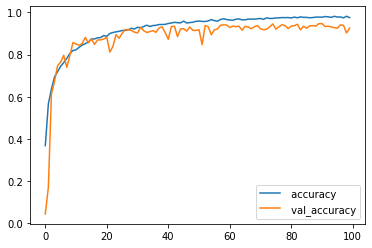

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label ="Train Loss")
plt.plot(hist.history["val_loss"],label ="Validation Loss")
plt.legend()
plt.figure()
plt.plot(hist.history["accuracy"],label =" accuracy")
plt.plot(hist.history["val_accuracy"],label =" val_accuracy")
plt.legend()
plt.show()
    